In [124]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [125]:
# Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import hvplot.pandas
import geoviews as gv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
plt.style.use('dark_background')


In [126]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [127]:
# Data import
ca_housing_path = ("Resources/CA_Housing_Data.csv")
ca_housing_data = pd.read_csv(ca_housing_path)
ca_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<Axes: xlabel='median_income', ylabel='median_house_value'>

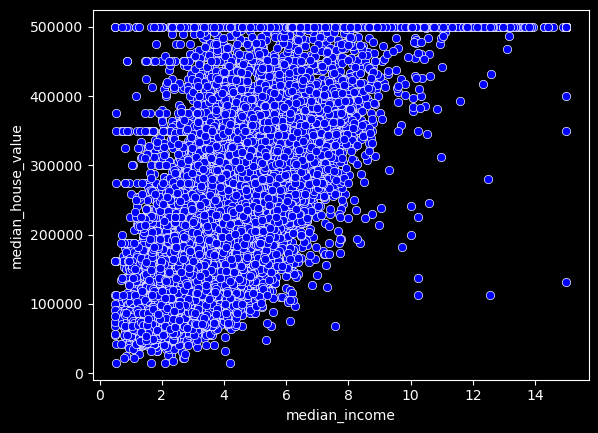

In [128]:
import seaborn as sns

sns.scatterplot(data=ca_housing_data, x='median_income', y='median_house_value', color='blue')
# scatterplot (median income & house value)

/var/folders/2d/61cgq1_16g18f_lk6zp5y1dw0000gn/T/ipykernel_16737/3221003809.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group_avg = ca_housing_data.groupby('income_group')['median_house_value'].mean().reset_index()
/var/folders/2d/61cgq1_16g18f_lk6zp5y1dw0000gn/T/ipykernel_16737/3221003809.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_group_avg, x='income_group', y='median_house_value', palette='coolwarm')


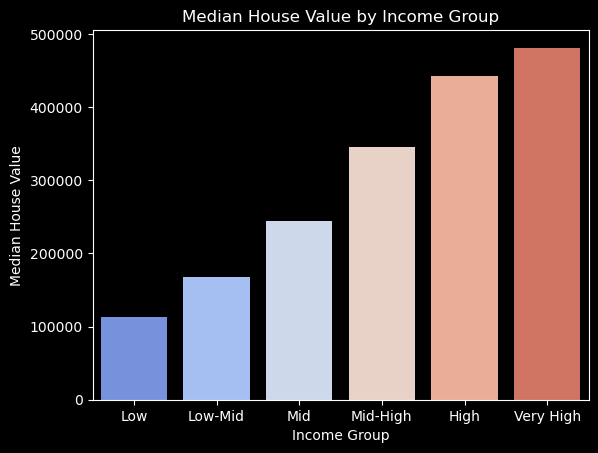

In [152]:
ca_housing_data['income_group'] = pd.cut(
    ca_housing_data['median_income'], 
    bins=[0, 2, 4, 6, 8, 10, 15], 
    labels=['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High', 'Very High']
)

# Aggregate by income group
income_group_avg = ca_housing_data.groupby('income_group')['median_house_value'].mean().reset_index()

# Bar plot
sns.barplot(data=income_group_avg, x='income_group', y='median_house_value', palette='coolwarm')
plt.title('Median House Value by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Median House Value')
plt.show()

<Axes: xlabel='households', ylabel='Count'>

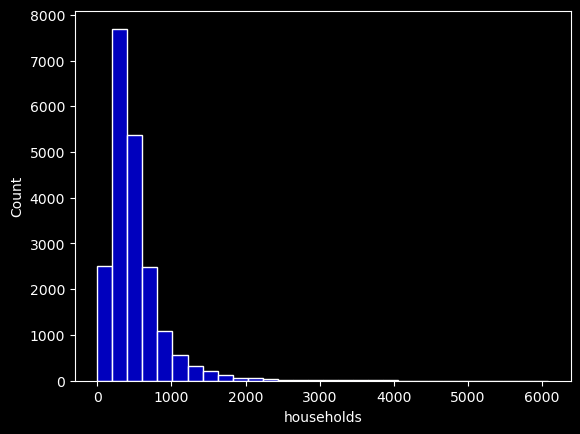

In [129]:
sns.histplot(ca_housing_data['households'], bins=30, color='blue')


In [131]:
avg_bedrooms_by_proximity = (
    ca_housing_data.groupby('ocean_proximity')
    .apply(lambda x: x['total_bedrooms'].sum() / x['households'].sum())
)    

print(avg_rooms_by_proximity)

ocean_proximity
<1H OCEAN     1.043829
INLAND        1.108811
ISLAND        1.519884
NEAR BAY      1.043134
NEAR OCEAN    1.062429
dtype: float64


/var/folders/2d/61cgq1_16g18f_lk6zp5y1dw0000gn/T/ipykernel_16737/1412296786.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['total_bedrooms'].sum() / x['households'].sum())


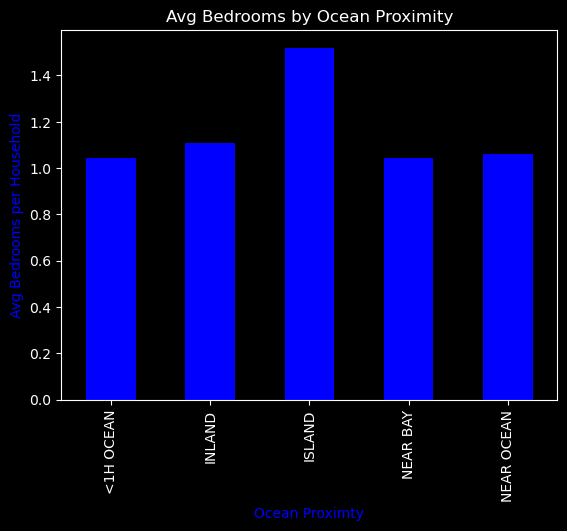

In [132]:
avg_bedrooms_by_proximity.plot(kind='bar', title= 'Avg Bedrooms by Ocean Proximity', color='blue')
plt.ylabel('Avg Bedrooms per Household', color='blue')
plt.xlabel('Ocean Proximty', color='blue')
plt.show()

In [133]:
correlations = ca_housing_data[['median_house_value', 'median_income', 'population']].corr()
print(correlations)

                    median_house_value  median_income  population
median_house_value            1.000000       0.688075   -0.024650
median_income                 0.688075       1.000000    0.004834
population                   -0.024650       0.004834    1.000000


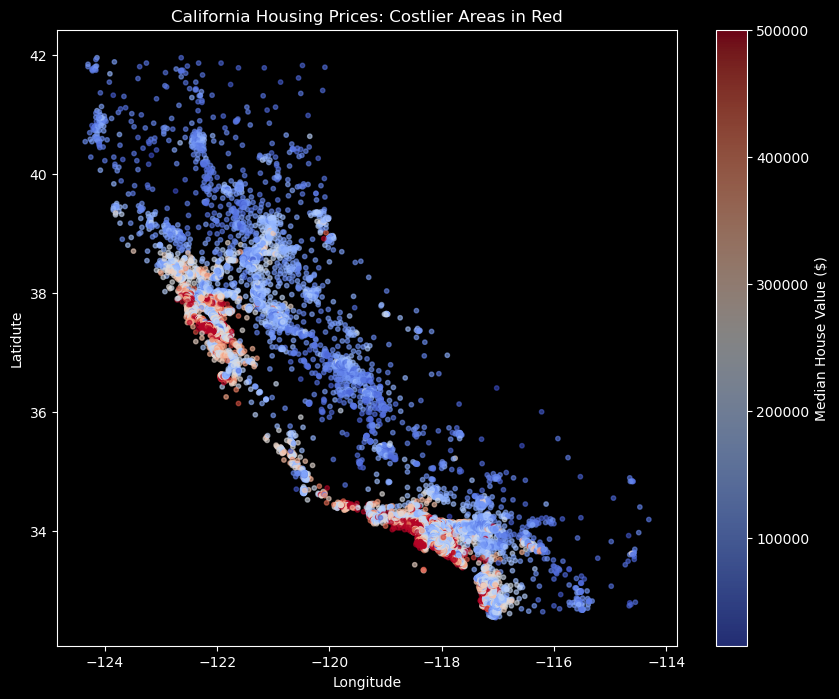

In [134]:
# Geo view of housing prices by color 
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    ca_housing_data['longitude'], ca_housing_data['latitude'],
    c=ca_housing_data['median_house_value'], cmap='coolwarm', alpha=0.6, s=10
)
plt.colorbar(label='Median House Value ($)')

plt.xlabel('Longitude')
plt.ylabel('Latidute')
plt.title('California Housing Prices: Costlier Areas in Red')

plt.show()

Visualization of median housing prices: Pricier homes in red 

In [143]:
# Population per house hold calculation
ca_housing_data['population_per_household'] = ca_housing_data['population'] / ca_housing_data['households']
print(ca_housing_data)

       longitude  latitude  housing_median_age  ...  ISLAND  NEAR BAY  NEAR OCEAN
0        -122.23     37.88                  41  ...     0.0       1.0         0.0
1        -122.22     37.86                  21  ...     0.0       1.0         0.0
2        -122.24     37.85                  52  ...     0.0       1.0         0.0
3        -122.25     37.85                  52  ...     0.0       1.0         0.0
4        -122.25     37.85                  52  ...     0.0       1.0         0.0
...          ...       ...                 ...  ...     ...       ...         ...
20635    -121.09     39.48                  25  ...     0.0       0.0         0.0
20636    -121.21     39.49                  18  ...     0.0       0.0         0.0
20637    -121.22     39.43                  17  ...     0.0       0.0         0.0
20638    -121.32     39.43                  18  ...     0.0       0.0         0.0
20639    -121.24     39.37                  16  ...     0.0       0.0         0.0

[20640 rows x 1

In [136]:
population_by_proximity = ca_housing_data.groupby('ocean_proximity').agg(
    total_population=('population', 'sum'),
    avg_population_per_household=('population_per_household', 'mean'),
    total_households=('households', 'sum')
)
print(population_by_proximity)

                 total_population  ...  total_households
ocean_proximity                    ...                  
<1H OCEAN                13889374  ...           4730118
INLAND                    9112744  ...           3127759
ISLAND                       3340  ...              1383
NEAR BAY                  2817427  ...           1118931
NEAR OCEAN                3598955  ...           1332308

[5 rows x 3 columns]


In [137]:
proximity_df = population_by_proximity.reset_index()
print(proximity_df)

  ocean_proximity  ...  total_households
0       <1H OCEAN  ...           4730118
1          INLAND  ...           3127759
2          ISLAND  ...              1383
3        NEAR BAY  ...           1118931
4      NEAR OCEAN  ...           1332308

[5 rows x 4 columns]


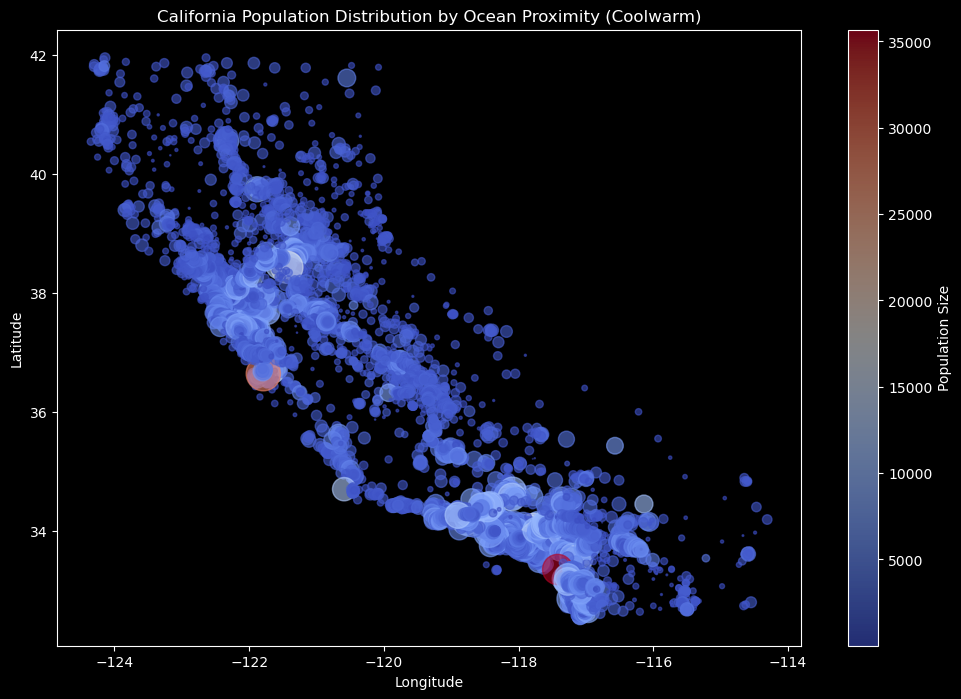

In [ ]:
# Map of population by ocean_proximity
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    ca_housing_data['longitude'], 
    ca_housing_data['latitude'], 
    c=ca_housing_data['population'],  
    cmap='coolwarm', 
    alpha=0.6, 
    s=ca_housing_data['households'] / 10  
)

# Add a colorbar
plt.colorbar(label='Population Size')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Population Distribution by Ocean Proximity (Coolwarm)')

plt.show()

In [142]:
encoder = OneHotEncoder()
encoded_ocean = encoder.fit_transform(ca_housing_data[['ocean_proximity']]).toarray()
ocean_categories = encoder.categories_[0]

# Add encoded ocean proximity back into the dataset
for i, category in enumerate(ocean_categories):
    ca_housing_data[category] = encoded_ocean[:, i]

# Features and target variable
X = ca_housing_data[['median_income', 'population', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN']]
y = ca_housing_data['median_house_value']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house values on the test set
predictions = model.predict(X_test)

# Check the model's accuracy
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))


Model Coefficients: [ 3.72340263e+04 -2.90817412e+00 -2.53923455e+05 -1.75580334e+05
 -1.55989611e+05 -1.59606276e+05]
Intercept: 262967.15030939644
R^2 Score: 0.5766695329432346


In [119]:
ca_housing_data['population_per_household'] = ca_housing_data['population'] / ca_housing_data['households']

# Aggregate population density by ocean proximity
density_by_proximity = ca_housing_data.groupby('ocean_proximity').agg(
    total_population=('population', 'sum'),
    total_households=('households', 'sum'),
    avg_population_per_household=('population_per_household', 'mean')
).reset_index()

print(density_by_proximity)

  ocean_proximity  ...  avg_population_per_household
0       <1H OCEAN  ...                      3.051860
1          INLAND  ...                      3.302954
2          ISLAND  ...                      2.383127
3        NEAR BAY  ...                      2.620121
4      NEAR OCEAN  ...                      2.952176

[5 rows x 4 columns]


/var/folders/2d/61cgq1_16g18f_lk6zp5y1dw0000gn/T/ipykernel_16737/2446191875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


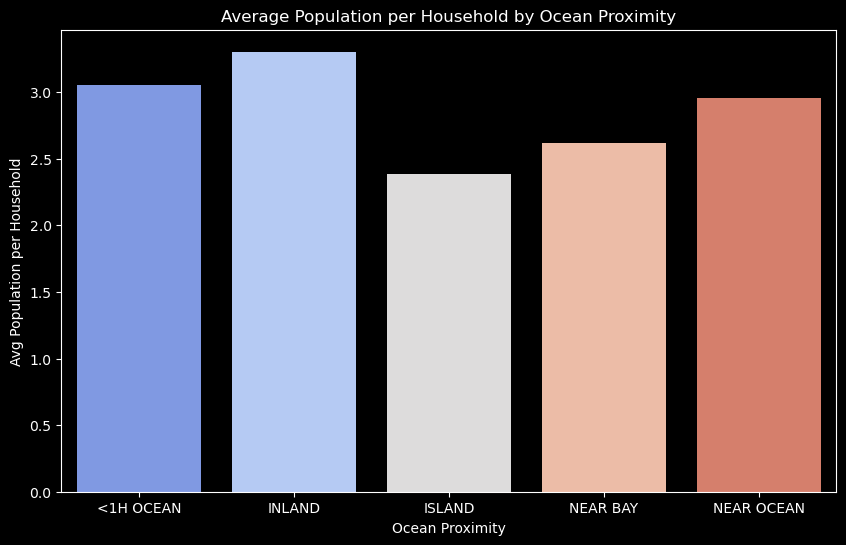

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=density_by_proximity,
    x='ocean_proximity',
    y='avg_population_per_household',
    palette='coolwarm'
)

plt.title('Average Population per Household by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Avg Population per Household')
plt.show()